In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.externals import joblib

In [119]:
from keras.models import model_from_json

# load json and create model
json_file = open('../saved-model/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
regressor = model_from_json(loaded_model_json)
# load weights into new model
regressor.load_weights("../saved-model/model.h5")
print("Loaded model from disk")

[labelencoder, onehotencoder, sc] = joblib.load('../saved-model/encoders.pkl')


Loaded model from disk


In [120]:
data = pd.read_csv("../data/cleaned_potong1.csv.tar.gz")
data = data.dropna()

In [121]:
def get_X_y(made_data):

    X_cols = ['day_of_week', 'status', 'hour', 'distance_to_next',
            'speed', 'linear_ref']
    y_col = ['time_to_next']
    
    X = made_data[X_cols].values
    y = made_data[y_col].values
    
    return X, y

In [122]:
X, y = get_X_y(data)

In [111]:
X[1, :]

array([5.0, 'outbound', 7.0, 0.0656595457445029, 27.904, 0.0284727293041134], dtype=object)

In [123]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# labelencoder = LabelEncoder()
X[:, 1] = labelencoder.transform(X[:, 1])
X = onehotencoder.transform(X).toarray()
X = X[:, 1:]
# sc = StandardScaler()
X = sc.fit_transform(X)

In [124]:
X[0,:]

array([-0.40041164, -0.39620407, -0.36023818, -0.36056126,  1.75405319,
       -0.41132308,  0.90239478, -1.54454179, -1.21080014, -0.14417386,
       -1.61770556])

In [125]:
y_pred = regressor.predict(X)

In [126]:
diff = abs(y_pred - y)

In [127]:
diff[:, 0].mean()

101.81501747530983

In [128]:
y_pred

array([[   82.93025208],
       [  112.27082825],
       [   23.39619827],
       ..., 
       [ 2701.60693359],
       [ 2602.17163086],
       [ 2760.70483398]], dtype=float32)

In [36]:
data

,Unnamed: 0,gps_timestamp,speed,vehicle_id,linear_inbound,linear_outbound,longitude,latitude,bus_line,status,...,next_time,next_lin_in,next_lin_out,next_status,next_trip_id,time_to_next,distance_to_next,hour,day_of_week,linear_ref
0,0,2017-07-01 07:31:45.800,17.037,359739072722465,0.994564,0.016325,98.365890,7.894253,pothong_1,outbound,...,2017-07-01 07:33:16.900,0.951040,0.069102,outbound,1.0,91,0.052777,7,5,0.016325
1,1,2017-07-01 07:32:16.100,27.904,359739072722465,0.919849,0.028473,98.366143,7.892881,pothong_1,outbound,...,2017-07-01 07:33:46.900,0.906116,0.094132,outbound,1.0,90,0.065660,7,5,0.028473
2,2,2017-07-01 07:32:46.600,38.207,359739072722465,0.940134,0.052338,98.367384,7.890430,pothong_1,outbound,...,2017-07-01 07:34:17.000,0.881804,0.119428,outbound,1.0,90,0.067090,7,5,0.052338
3,3,2017-07-01 07:33:16.900,38.798,359739072722465,0.951040,0.069102,98.368734,7.891490,pothong_1,outbound,...,2017-07-01 07:34:47.000,0.853155,0.149162,outbound,1.0,90,0.080060,7,5,0.069102
4,4,2017-07-01 07:33:46.900,38.496,359739072722465,0.906116,0.094132,98.368699,7.894403,pothong_1,outbound,...,2017-07-01 07:35:17.000,0.822671,0.180796,outbound,1.0,90,0.086664,7,5,0.094132
5,5,2017-07-01 07:34:17.000,44.857,359739072722465,0.881804,0.119428,98.368400,7.897291,pothong_1,outbound,...,2017-07-01 07:35:47.000,0.813565,0.190138,outbound,1.0,90,0.070710,7,5,0.119428
6,6,2017-07-01 07:34:47.000,45.548,359739072722465,0.853155,0.149162,98.368016,7.900684,pothong_1,outbound,...,2017-07-01 07:36:17.300,0.813604,0.190097,outbound,1.0,90,0.040935,7,5,0.149162
7,7,2017-07-01 07:35:17.000,42.439,359739072722465,0.822671,0.180796,98.367601,7.904296,pothong_1,outbound,...,2017-07-01 07:36:47.900,0.809255,0.199323,outbound,1.0,90,0.018527,7,5,0.180796
8,8,2017-07-01 07:35:47.000,0.063,359739072722465,0.813565,0.190138,98.367656,7.905372,pothong_1,outbound,...,2017-07-01 07:37:18.200,0.785663,0.225256,outbound,1.0,91,0.035118,7,5,0.190138
9,9,2017-07-01 07:36:17.300,0.115,359739072722465,0.813604,0.190097,98.367658,7.905367,pothong_1,outbound,...,2017-07-01 07:37:48.300,0.774338,0.236949,outbound,1.0,91,0.046853,7,5,0.190097


In [135]:
X2, y2 = get_X_y(data)

In [138]:
X2 = np.array(X2)
X2

array([[5.0, 'outbound', 7.0, 0.052776736222256884, 17.037,
        0.016325129922923003],
       [5.0, 'outbound', 7.0, 0.0656595457445029, 27.904,
        0.0284727293041134],
       [5.0, 'outbound', 7.0, 0.06708983156218581, 38.207,
        0.0523381306918372],
       ..., 
       [5.0, 'outbound', 12.0, 0.927731994056548, 17.425, 0.024095856595409],
       [5.0, 'outbound', 12.0, 0.9296341493671401, 40.211,
        0.0465158566286761],
       [5.0, 'outbound', 12.0, 0.920362504415877, 30.33, 0.0590278347130322]], dtype=object)

In [139]:
meter = X2[:, 3] * 13000

In [140]:
meter

array([686.0975708893395, 853.5740946785378, 872.1678103084156, ...,
       12060.515922735125, 12085.24394177282, 11964.712557406401], dtype=object)

/home/aiy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


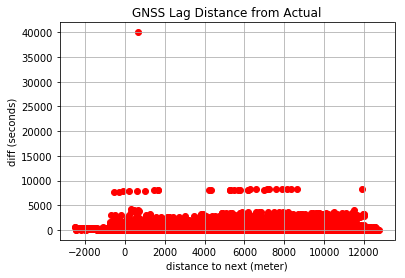

In [143]:
plt.scatter(meter, diff, c='red')
plt.xlabel("distance to next (meter)")
plt.ylabel("diff (seconds)")
plt.title("GNSS Lag Distance from Actual")
plt.legend()
plt.grid()
plt.show()

In [153]:
d = pd.DataFrame({'meter': meter, 'seconds': diff[:,0]})

In [154]:
d

,meter,seconds
0,686.098,8.069748
1,853.574,22.270828
2,872.168,66.603802
3,1040.78,23.698105
4,1126.63,211.493500
5,919.229,256.952240
6,532.153,44.408829
7,240.852,56.507706
8,456.534,8.648331
9,609.085,13.450516


In [156]:
d = d[d['seconds'] < 10000]

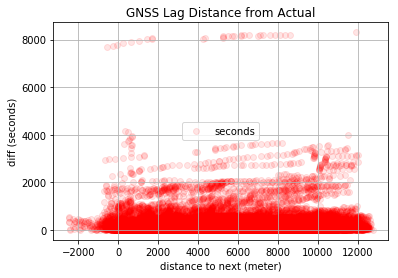

In [161]:
plt.scatter(d['meter'], d['seconds'], c='red', alpha=0.1)
plt.xlabel("distance to next (meter)")
plt.ylabel("diff (seconds)")
plt.title("GNSS Lag Distance from Actual")
plt.legend()
plt.grid()
plt.show()

In [160]:
d.mean()

meter      3872.340116
seconds     101.663378
dtype: float64

In [162]:
d = d[d['seconds'] < 2000]

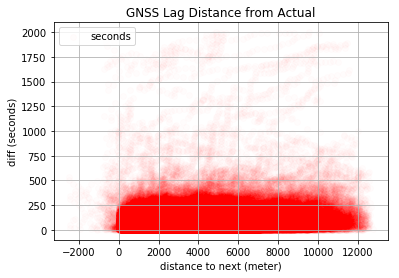

In [165]:
plt.scatter(d['meter'], d['seconds'], c='red', alpha=0.01)
plt.xlabel("distance to next (meter)")
plt.ylabel("diff (seconds)")
plt.title("GNSS Lag Distance from Actual")
plt.legend()
plt.grid()
plt.show()

In [164]:
d[d['meter'] < 2000]

,meter,seconds
0,686.098,8.069748
1,853.574,22.270828
2,872.168,66.603802
3,1040.78,23.698105
4,1126.63,211.493500
5,919.229,256.952240
6,532.153,44.408829
7,240.852,56.507706
8,456.534,8.648331
9,609.085,13.450516
